<h1>Experiment with beer3pos</h1>

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os
import sys
basedir = '/home/joewandy/git/metabolomics_tools'
sys.path.append(basedir)

In [17]:
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import display, HTML

import cPickle
import random
import copy
import glob
import gzip

In [18]:
from alignment.models import HyperPars as AlignmentHyperPars
from alignment.experiment import *

<h2>Experiment Parameters</h2>

Set up all the experiment parameters

In [19]:
input_dir = '/home/joewandy/git/metabolomics_tools/alignment/input/beer3pos'
transformation_file = '/home/joewandy/git/metabolomics_tools/alignment/pos_transformations_full.yml'
gt_file = '/home/joewandy/git/metabolomics_tools/alignment/input/beer3pos/ground_truth/beer3.positive.dat'

In [20]:
hp = AlignmentHyperPars()    
hp.within_file_mass_tol = 3
hp.within_file_rt_tol = 10
hp.across_file_mass_tol = 10
hp.across_file_rt_tol = 60
hp.alpha_mass = 1
hp.dp_alpha = 1000.0
hp.beta = 0.1
hp.t = 0.0
hp.mass_clustering_n_iterations = 400
hp.rt_clustering_nsamps = 100
hp.rt_clustering_burnin = 0

print hp

Hyperparameters across_file_mass_tol=10, across_file_rt_tol=60, alpha_mass=1, beta=0.1, dp_alpha=1000.0, mass_clustering_n_iterations=400, matching_alpha=0.3, rt_clustering_burnin=0, rt_clustering_nsamps=100, t=0.0, within_file_mass_tol=3, within_file_rt_tol=10


In [21]:
evaluation_method = 2
n_iter = 1

In [22]:
param_list = []
for mass_tol in range(2, 7, 2):
    for rt_tol in range(5, 31, 5):
        param_list.append((mass_tol, rt_tol))

In [23]:
param_list_mwg = []
for mass_tol in range(2, 7, 2):
    for rt_tol in range(5, 31, 5):
        for group_tol in range(2, 11, 2):
            for alpha in range(0, 11, 2):
                param_list_mwg.append((mass_tol, rt_tol, group_tol, alpha/10.0))

<h2>Create the first-stage clustering for all input files -- Gibbs, mh_biggest=True</h2>

In [24]:
combined_list = load_or_create_clustering('pickles/beer3pos/clustering.p', input_dir, transformation_file, hp)

7553 features read from beer3-file1.csv
7579 features read from beer3-file2.csv
7240 features read from beer3-file3.csv


[Parallel(n_jobs=4)]: Done   2 out of   3 | elapsed:  7.9min remaining:  3.9min
[Parallel(n_jobs=4)]: Done   1 out of   3 | elapsed:  7.9min remaining: 15.9min
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:  7.9min finished


Saved to pickles/beer3pos/clustering.p
Created 7553 clusters
Created 7579 clusters
Created 7240 clusters
Binning with mh_biggest = True
Binning with mh_biggest = True
Binning with mh_biggest = True
Assigning possible transformations 0/7553
Assigning possible transformations 0/7579
Assigning possible transformations 0/7240
Assigning possible transformations 500/7553
Assigning possible transformations 500/7579
Assigning possible transformations 500/7240
Assigning possible transformations 1000/7553
Assigning possible transformations 1000/7579
Assigning possible transformations 1000/7240
Assigning possible transformations 1500/7553
Assigning possible transformations 1500/7579
Assigning possible transformations 1500/7240
Assigning possible transformations 2000/7553
Assigning possible transformations 2000/7579
Assigning possible transformations 2000/7240
Assigning possible transformations 2500/7553
Assigning possible transformations 2500/7579
Assigning possible transformations 2500/7240
Assi

<h2>Run experiment with beer3pos</h2>

In [25]:
n_files = 3

In [26]:
training_list = load_or_create_filelist('pickles/beer3pos/training_list.p', combined_list, n_iter, n_files)

['beer3-file2.csv', 'beer3-file1.csv', 'beer3-file3.csv']
Saved to pickles/beer3pos/training_list.p


In [27]:
testing_list = load_or_create_filelist('pickles/beer3pos/testing_list.p', combined_list, n_iter, n_files)

['beer3-file2.csv', 'beer3-file1.csv', 'beer3-file3.csv']
Saved to pickles/beer3pos/testing_list.p


In [28]:
exp_results_1a = run_experiment(0, training_list, testing_list, param_list, 'pickles/beer3pos/res_match_feature.p', hp, evaluation_method, transformation_file, gt_file)

Iteration 0
Training on ['beer3-file2.csv', 'beer3-file1.csv', 'beer3-file3.csv']
mass_tol=2, rt_tol=5, tp=231, fp=24, fn=45, prec=0.906, rec=0.837, f1=0.870, th_prob=1.000
mass_tol=2, rt_tol=10, tp=247, fp=29, fn=29, prec=0.895, rec=0.895, f1=0.895, th_prob=1.000
mass_tol=2, rt_tol=15, tp=251, fp=29, fn=25, prec=0.896, rec=0.909, f1=0.903, th_prob=1.000
mass_tol=2, rt_tol=20, tp=251, fp=33, fn=25, prec=0.884, rec=0.909, f1=0.896, th_prob=1.000
mass_tol=2, rt_tol=25, tp=251, fp=33, fn=25, prec=0.884, rec=0.909, f1=0.896, th_prob=1.000
mass_tol=2, rt_tol=30, tp=251, fp=33, fn=25, prec=0.884, rec=0.909, f1=0.896, th_prob=1.000
mass_tol=4, rt_tol=5, tp=231, fp=24, fn=45, prec=0.906, rec=0.837, f1=0.870, th_prob=1.000
mass_tol=4, rt_tol=10, tp=247, fp=29, fn=29, prec=0.895, rec=0.895, f1=0.895, th_prob=1.000
mass_tol=4, rt_tol=15, tp=251, fp=29, fn=25, prec=0.896, rec=0.909, f1=0.903, th_prob=1.000
mass_tol=4, rt_tol=20, tp=251, fp=33, fn=25, prec=0.884, rec=0.909, f1=0.896, th_prob=1.000


In [29]:
exp_results_1b = run_experiment(1, training_list, testing_list, param_list, 'pickles/beer3pos/res_match_cluster.p', hp, evaluation_method, transformation_file, gt_file)

Iteration 0
Training on ['beer3-file2.csv', 'beer3-file1.csv', 'beer3-file3.csv']
mass_tol=2, rt_tol=5, tp=222, fp=21, fn=54, prec=0.914, rec=0.804, f1=0.855, th_prob=1.000
mass_tol=2, rt_tol=10, tp=241, fp=22, fn=35, prec=0.916, rec=0.873, f1=0.894, th_prob=1.000
mass_tol=2, rt_tol=15, tp=247, fp=22, fn=29, prec=0.918, rec=0.895, f1=0.906, th_prob=1.000
mass_tol=2, rt_tol=20, tp=247, fp=25, fn=29, prec=0.908, rec=0.895, f1=0.901, th_prob=1.000
mass_tol=2, rt_tol=25, tp=247, fp=25, fn=29, prec=0.908, rec=0.895, f1=0.901, th_prob=1.000
mass_tol=2, rt_tol=30, tp=247, fp=25, fn=29, prec=0.908, rec=0.895, f1=0.901, th_prob=1.000
mass_tol=4, rt_tol=5, tp=222, fp=21, fn=54, prec=0.914, rec=0.804, f1=0.855, th_prob=1.000
mass_tol=4, rt_tol=10, tp=241, fp=22, fn=35, prec=0.916, rec=0.873, f1=0.894, th_prob=1.000
mass_tol=4, rt_tol=15, tp=247, fp=22, fn=29, prec=0.918, rec=0.895, f1=0.906, th_prob=1.000
mass_tol=4, rt_tol=20, tp=247, fp=25, fn=29, prec=0.908, rec=0.895, f1=0.901, th_prob=1.000


In [30]:
exp_results_1c = run_experiment(3, training_list, testing_list, param_list, 'pickles/beer3pos/res_mwg.p', hp, evaluation_method, transformation_file, gt_file)

Iteration 0
Training on ['beer3-file2.csv', 'beer3-file1.csv', 'beer3-file3.csv']
mass_tol=2, rt_tol=5, tp=235, fp=23, fn=41, prec=0.911, rec=0.851, f1=0.880, th_prob=1.000
mass_tol=2, rt_tol=10, tp=251, fp=28, fn=25, prec=0.900, rec=0.909, f1=0.905, th_prob=1.000
mass_tol=2, rt_tol=15, tp=255, fp=28, fn=21, prec=0.901, rec=0.924, f1=0.912, th_prob=1.000
mass_tol=2, rt_tol=20, tp=255, fp=30, fn=21, prec=0.895, rec=0.924, f1=0.909, th_prob=1.000
mass_tol=2, rt_tol=25, tp=255, fp=30, fn=21, prec=0.895, rec=0.924, f1=0.909, th_prob=1.000
mass_tol=2, rt_tol=30, tp=255, fp=30, fn=21, prec=0.895, rec=0.924, f1=0.909, th_prob=1.000
mass_tol=4, rt_tol=5, tp=235, fp=23, fn=41, prec=0.911, rec=0.851, f1=0.880, th_prob=1.000
mass_tol=4, rt_tol=10, tp=251, fp=28, fn=25, prec=0.900, rec=0.909, f1=0.905, th_prob=1.000
mass_tol=4, rt_tol=15, tp=255, fp=28, fn=21, prec=0.901, rec=0.924, f1=0.912, th_prob=1.000
mass_tol=4, rt_tol=20, tp=255, fp=30, fn=21, prec=0.895, rec=0.924, f1=0.909, th_prob=1.000


<h2>Plotting</h2>

In [31]:
def plot_density(exp_res, title):
    training_dfs = []
    for item in exp_res:
        training_data, training_df, best_training_row, match_res = item
        training_dfs.append(training_df)
    combined = pd.concat(training_dfs, axis=0)
    combined = combined.reset_index(drop=True)
#     f, ax = plt.subplots(figsize=(6, 6))    
#     sns.kdeplot(combined.Rec, combined.Prec, ax=ax)
#     sns.rugplot(combined.Rec, ax=ax)
#     sns.rugplot(combined.Prec, vertical=True, ax=ax)    
#     ax.set_xlim([0.7, 1.0])
#     ax.set_ylim([0.7, 1.0])
    g = sns.JointGrid(x="Rec", y="Prec", data=combined, xlim=(0.7, 1.0), ylim=(0.7, 1.0))
    g = g.plot_joint(sns.kdeplot)
    g = g.plot_marginals(sns.kdeplot, shade=True)
    ax = g.ax_joint
    ax.set_xlabel('Rec')
    ax.set_ylabel('Prec')
    ax = g.ax_marg_x
    ax.set_title(title)    

/home/joewandy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/joewandy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


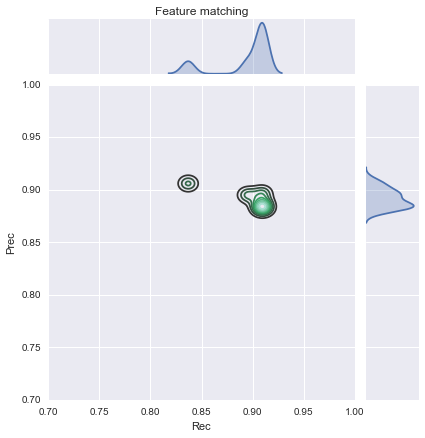

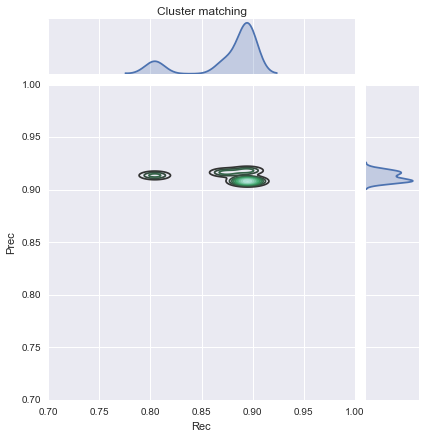

In [32]:
plot_density(exp_results_1a, 'Feature matching')
plot_density(exp_results_1b, 'Cluster matching')